In [1]:
import pandas as pd
import numpy as np
import scipy as scipy

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

rawdata = pd.read_csv('https://data.cdc.gov/api/views/u6jv-9ijr/rows.csv?accessType=DOWNLOAD&bom=true&format=true%20target=')

rawdata = rawdata[rawdata['Jurisdiction'] != 'United States']

Text(0.5, 1.0, 'Number of deaths per year up to this week, divided by cause subgroup')

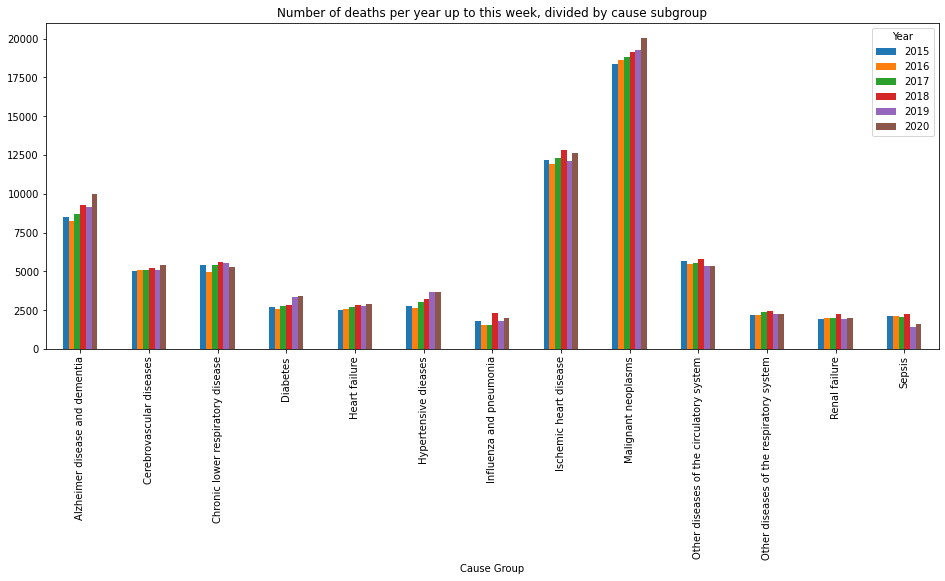

In [2]:
state = 'Texas'
statedata = rawdata[rawdata['Jurisdiction'] == state]

statedatatocurrentweek = statedata[statedata['Week'] <= statedata[statedata['Year'] == 2020]['Week'].max()]

statedeathtable = statedatatocurrentweek.groupby(['Year', 'Cause Group']).sum().reset_index().pivot(index='Cause Group', columns='Year', values='Number of Deaths')

ax = statedeathtable.plot.bar(figsize=(16,6))
ax.set_title('Number of deaths per year up to this week, divided by cause subgroup')



In [82]:
statedatatocurrentweek = statedata[statedata['Week'] <= statedata[statedata['Year'] == 2020]['Week'].max()]

pre2020averages = statedatatocurrentweek[statedatatocurrentweek['Year'] < 2020].groupby(['Year', 'Cause Group']).sum()[['Number of Deaths']].groupby(['Cause Group']).mean()

pre2020averages['Number of Deaths 2020'] = statedatatocurrentweek[statedatatocurrentweek['Year'] == 2020].groupby(['Cause Group']).sum()['Number of Deaths']

pre2020averages['Percent Change'] = (pre2020averages['Number of Deaths 2020'].div(pre2020averages['Number of Deaths']) - 1) * 100

#pre2020averages.sort_values('Percent Change', ascending=False)[['Number of Deaths', 'Number of Deaths 2020']].plot.bar(figsize=(16,9))


In [4]:
totalNumberOfDeaths = pre2020averages[['Number of Deaths', 'Number of Deaths 2020']].sum()['Number of Deaths 2020']
averageNumberOfDeaths = pre2020averages[['Number of Deaths', 'Number of Deaths 2020']].sum()['Number of Deaths']

print('Death percentage change over 2015-2019: ' + str((totalNumberOfDeaths / averageNumberOfDeaths - 1) *100))

Death percentage change over 2015-2019: 5.3450039598732735


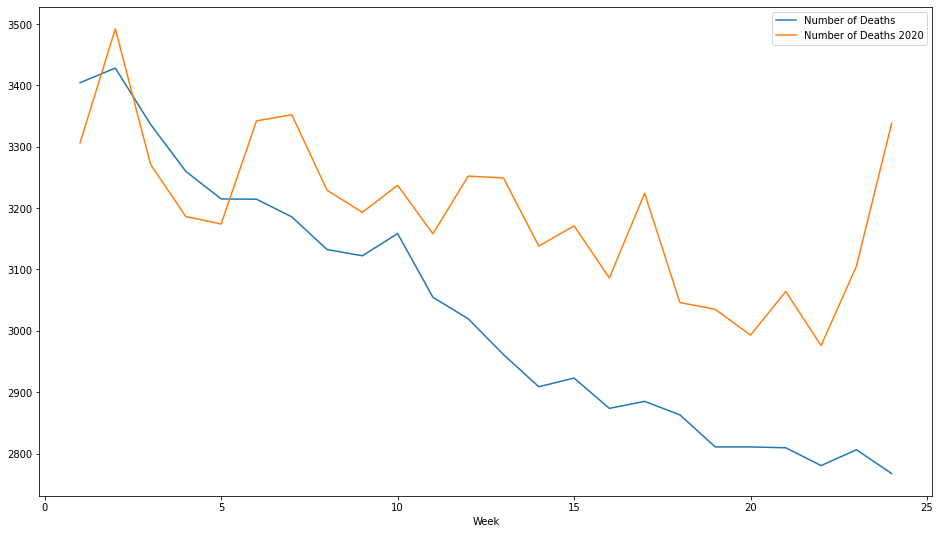

In [5]:
statedatatocurrentweek = statedata[statedata['Week'] <= statedata[statedata['Year'] == 2020]['Week'].max()]

pre2020averages = statedatatocurrentweek[statedatatocurrentweek['Year'] < 2020].groupby(['Year', 'Week']).sum()[['Number of Deaths']].groupby(['Week']).mean()

pre2020averages['Number of Deaths 2020'] = statedatatocurrentweek[statedatatocurrentweek['Year'] == 2020].groupby(['Week']).sum()['Number of Deaths']

pre2020averages['Percent Change'] = (pre2020averages['Number of Deaths 2020'].div(pre2020averages['Number of Deaths']) - 1) * 100

pre2020averages[['Number of Deaths', 'Number of Deaths 2020']].plot.line(figsize=(16,9))



In [7]:
import matplotlib.pyplot as plt

certainstates = ['Texas', 'Colorado', 'New York', 'New Jersey', 'Florida', 'Colorado']

gte2020 = rawdata[rawdata['Year'] == 2020].groupby(['Jurisdiction', 'Week'])[['Number of Deaths']].sum()
maxweek = gte2020.reset_index()['Week'].max()
lt2020 = rawdata[(rawdata['Year'] < 2020) & (rawdata['Week'] <= maxweek)].groupby(['Jurisdiction', 'Year', 'Week']).sum()[['Number of Deaths']].groupby(['Jurisdiction', 'Week']).mean()#.rename(columns={'Number of Deaths': 'Avg'})

compareData = lt2020.copy().rename(columns={'Number of Deaths':'Average'})

compareData['2020'] = gte2020['Number of Deaths']

compareData = compareData.fillna(0)

compareData['Difference'] = (compareData['2020'].div(compareData['Average']) * 100) - 100

compareData = compareData.reset_index()
#compareData = compareData[compareData['Jurisdiction'].isin(certainstates)]

pivottable = compareData.pivot(index='Week', columns='Jurisdiction', values='Difference')

pivottable['Week Ending'] = pd.to_datetime(rawdata[rawdata['Year'] == 2020].groupby(['Week'])['Week Ending Date'].max())
pivottable = pivottable.reset_index().set_index('Week Ending').drop(['Week'], axis=1)

states = pivottable.columns

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'New York City', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [11]:
pivottable = pivottable.rolling(window=4).mean().dropna()

Text(0.5, 1.0, "Who's peaking right now?")

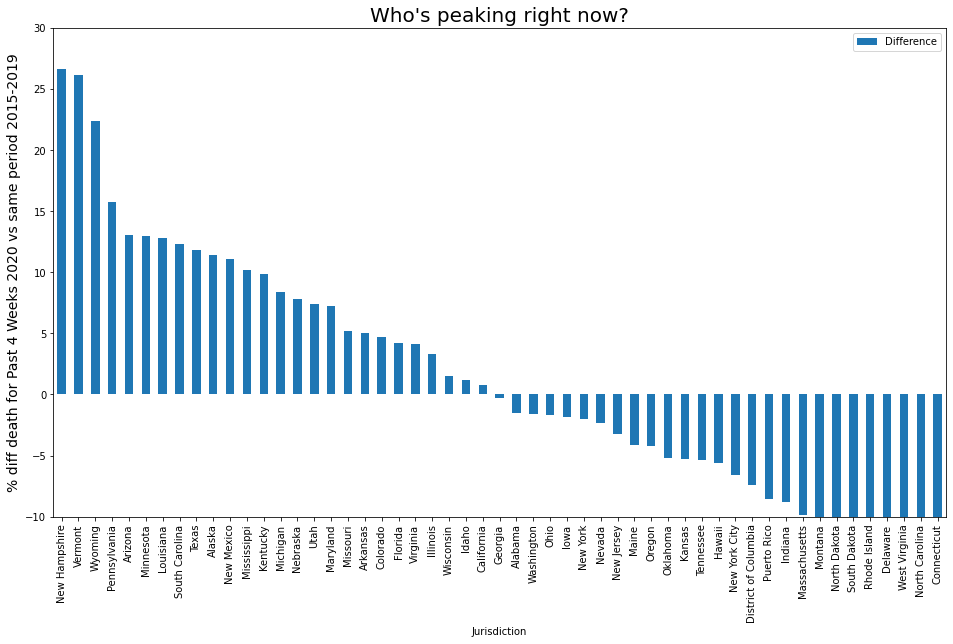

In [318]:
certainstates = ['Texas', 'Colorado', 'New York', 'Oklahoma', 'Mississippi', 'Louisiana']

gte2020 = rawdata[rawdata['Year'] == 2020].groupby(['Jurisdiction', 'Week'])[['Number of Deaths']].sum()
maxweek = gte2020.reset_index()['Week'].max()
lt2020 = rawdata[(rawdata['Year'] < 2020) & (rawdata['Week'] <= maxweek)].groupby(['Jurisdiction', 'Year', 'Week']).sum()[['Number of Deaths']].groupby(['Jurisdiction', 'Week']).mean()#.rename(columns={'Number of Deaths': 'Avg'})

compareData = lt2020.copy().rename(columns={'Number of Deaths':'Average'})
#compareData['2020'] = gte2020['Number of Deaths']

#pd.merge(lt2020.reset_index(), gt2020.reset_index(), left_on=['Jurisdiction', 'Week', 'Year'])
compareData['2020'] = gte2020['Number of Deaths']

compareData = compareData.fillna(0)

compareData['Difference'] = (compareData['2020'].div(compareData['Average']) * 100) - 100

compareData = compareData.reset_index()
#compareData = compareData[compareData['Jurisdiction'].isin(certainstates)]

pivottable = compareData[(compareData['Week'] > maxweek - 4)].reset_index()[['Jurisdiction', 'Difference']].groupby(['Jurisdiction']).mean() #.pivot(index='Jurisdiction', values='Difference')

ax = pivottable.sort_values('Difference', ascending=False).plot.bar(figsize=(16,9), ylim=(-10, 30))
ax.set_ylabel('% diff death for Past 4 Weeks 2020 vs same period 2015-2019', size=14)
ax.set_title('Who\'s peaking right now?', size=20)
#ax.ylim(-50, 50)
#ax.axhline(color='black')
#ax.set_title('2020 Death Percentage compared to Average')


In [279]:
rawdata[(rawdata['Year'] == 2017)].groupby(['Cause Group']).sum()

,Year,Week,Number of Deaths,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020
Cause Group,,,,,,
Alzheimer disease and dementia,5127214,67139,262506.0,259370,0.0,0.0
Cerebrovascular diseases,4616913,60478,144497.0,143428,0.0,0.0
Chronic lower respiratory disease,4729865,61645,158415.0,155390,0.0,0.0
Diabetes,4040051,52917,82918.0,82254,0.0,0.0
Heart failure,3618498,46888,75969.0,75984,0.0,0.0
Hypertensive dieases,3870623,50937,87198.0,87056,0.0,0.0
Influenza and pneumonia,3257455,40603,50826.0,50137,0.0,0.0
Ischemic heart disease,5413628,70976,368960.0,366873,0.0,0.0
Malignant neoplasms,5556835,73002,603587.0,601956,0.0,0.0


In [263]:
rawdata.describe()

,Year,Week,Number of Deaths,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020
count,149842.000000,149842.000000,149824.000000,149842.000000,12595.000000,12595.000000
mean,2017.261822,25.080725,157.379198,157.365638,5.779039,5.989218
std,1.589440,15.148573,681.839026,681.418951,64.565933,27.931251
min,2015.000000,1.000000,11.000000,11.000000,-628.000000,-62.100000
25%,2016.000000,12.000000,23.000000,24.000000,-5.000000,-9.200000
50%,2017.000000,24.000000,44.000000,44.000000,1.000000,2.800000
75%,2019.000000,38.000000,95.000000,95.000000,9.000000,17.200000
max,2020.000000,52.000000,12433.000000,12046.000000,1961.000000,534.300000


In [269]:
rawdata[rawdata['Jurisdiction'] != 'United States']rawdata['Jurisdiction']

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'New York City',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'United States',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [266]:
52*13

676

,Jurisdiction,Week Ending Date,State Abbreviation,Year,Week,Cause Group,Number of Deaths,Cause Subgroup,Time Period,Suppress,Note,Average Number of Deaths in Time Period,Difference from 2015-2019 to 2020,Percent Difference from 2015-2019 to 2020,Type
0,Alabama,2015-01-10,AL,2015,1,Alzheimer disease and dementia,120.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
1,Alabama,2016-01-09,AL,2016,1,Alzheimer disease and dementia,76.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
2,Alabama,2017-01-07,AL,2017,1,Alzheimer disease and dementia,96.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
3,Alabama,2018-01-06,AL,2018,1,Alzheimer disease and dementia,108.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
4,Alabama,2019-01-05,AL,2019,1,Alzheimer disease and dementia,115.0,Alzheimer disease and dementia,2015-2019,NaN,NaN,103,NaN,NaN,Predicted (weighted)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149837,Wisconsin,2016-01-02,WI,2015,52,Other diseases of the respiratory system,23.0,Respiratory diseases,2015-2019,NaN,NaN,25,NaN,NaN,Predicted (weighted)
149838,Wisconsin,2016-12-31,WI,2016,52,Other diseases of the respiratory system,30.0,Respiratory diseases,2015-2019,NaN,NaN,25,NaN,NaN,Predicted (weighted)
149839,Wisconsin,2017-12-30,WI,2017,52,Other diseases of the respiratory system,20.0,Respiratory diseases,2015-2019,NaN,NaN,25,NaN,NaN,Predicted (weighted)
149840,Wisconsin,2018-12-29,WI,2018,52,Other diseases of the respiratory system,27.0,Respiratory diseases,2015-2019,NaN,NaN,25,NaN,NaN,Predicted (weighted)


In [356]:
pivottable

Jurisdiction,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Week Ending,,,,,,,,,,,,,,,,,,,,,
2020-01-04,-1.018100,-31.623932,3.408374,-2.510004,-3.996221,-3.294893,-7.193959,-9.365559,-23.387097,2.993012,...,-17.211329,-2.179177,-2.884672,-14.492754,-6.810036,-4.108376,-4.313554,-0.561798,-3.510785,90.058480
2020-01-11,-2.141177,19.295052,4.023676,1.067186,-4.733035,0.412981,-7.397134,-3.058593,-17.516414,2.572686,...,7.786509,3.881083,0.579896,14.605371,-12.629190,3.724988,-2.718784,0.718304,-7.571662,-21.893242
2020-01-18,-5.126138,14.624560,6.964747,-0.800241,-2.148689,5.910258,-8.414849,-12.703895,42.059357,1.527104,...,-5.027660,1.485512,-1.098937,12.075134,20.043562,2.568304,-1.033699,7.910403,-3.032061,47.815864
2020-01-25,-4.274853,-9.530969,3.396086,-3.438938,1.381402,8.336152,-6.675481,-8.160239,8.604557,3.392849,...,-3.318807,1.748080,-1.841520,1.072196,22.501969,2.455284,-0.473869,3.469541,-2.127231,19.676254
2020-02-01,-6.614134,18.981624,2.719112,0.154234,0.175744,3.933071,-1.729372,-22.471287,8.773190,1.398001,...,7.311456,2.908421,-1.479208,2.036933,-9.826489,3.325861,2.785282,0.946737,5.379806,3.123137
2020-02-08,-3.125951,28.206547,1.212931,4.938722,2.543147,4.965431,-5.440798,-21.396074,-0.827755,2.553593,...,-7.576035,1.941490,1.954424,-5.763719,-1.992144,7.635526,0.928053,6.422079,-0.135669,-25.009385
2020-02-15,-2.427216,7.060737,6.112883,4.134815,0.821838,-0.569568,-3.241672,-23.171054,-20.646835,1.429949,...,11.501136,-1.653749,4.011055,11.885117,13.188136,3.386794,1.120531,4.884659,4.843161,-8.425429
2020-02-22,0.307368,-13.678952,9.801565,5.093545,1.751165,6.140695,0.188667,-8.481586,-13.548410,1.798528,...,30.893268,-1.725161,3.428124,-0.439178,-6.171158,3.166538,0.973327,6.793566,18.724754,-31.706728
2020-02-29,6.107069,-15.556988,9.427823,3.840918,-0.094343,9.448413,-1.896622,-6.993063,6.507196,2.722783,...,11.751709,0.891850,2.698655,-0.467026,29.392777,1.374241,0.856113,4.964336,20.094255,8.700352


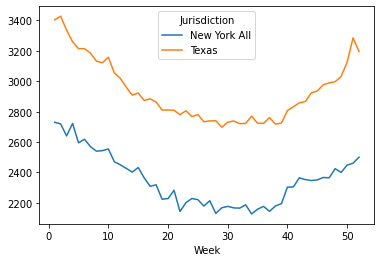

In [396]:
states = ['New York', 'New York City', 'Texas']
statedata = rawdata[rawdata['Jurisdiction'].isin(states)]
early = statedata[statedata['Year'] < 2020]

early = early.groupby(['Jurisdiction', 'Week']).sum()
early['Number of Deaths'] = early['Number of Deaths'] / 5
early = early[['Number of Deaths']]
early = early.reset_index().pivot(index='Week', columns='Jurisdiction', values='Number of Deaths')
early['New York All'] = early['New York'] + early['New York City']
ax = early[['New York All', 'Texas']].plot.line()

Text(0.5, 0, 'Week')

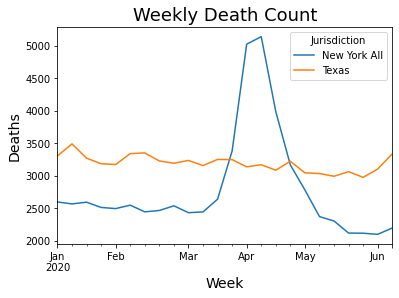

In [424]:

late = statedata[statedata['Year'] == 2020]
late = late.groupby(['Jurisdiction', 'Week']).sum()
late = late[['Number of Deaths']]
late = late.reset_index().pivot(index='Week', columns='Jurisdiction', values='Number of Deaths')
late['Week Ending'] = pd.to_datetime(statedata[statedata['Year'] == 2020].groupby(['Week'])['Week Ending Date'].max())
late = late.reset_index().set_index(['Week Ending'])
late['New York All'] = late['New York'] + late['New York City']
ax = late[['New York All', 'Texas']].plot.line()
ax.set_title('Weekly Death Count', size=18)
ax.set_ylabel('Deaths', size=14)
ax.set_xlabel('Week', size=14)


#late

Text(100, -70, "Reported deaths per week in 2020 vs the same time period's average in 2015-2019, and sorted by peak. Source: CDC")

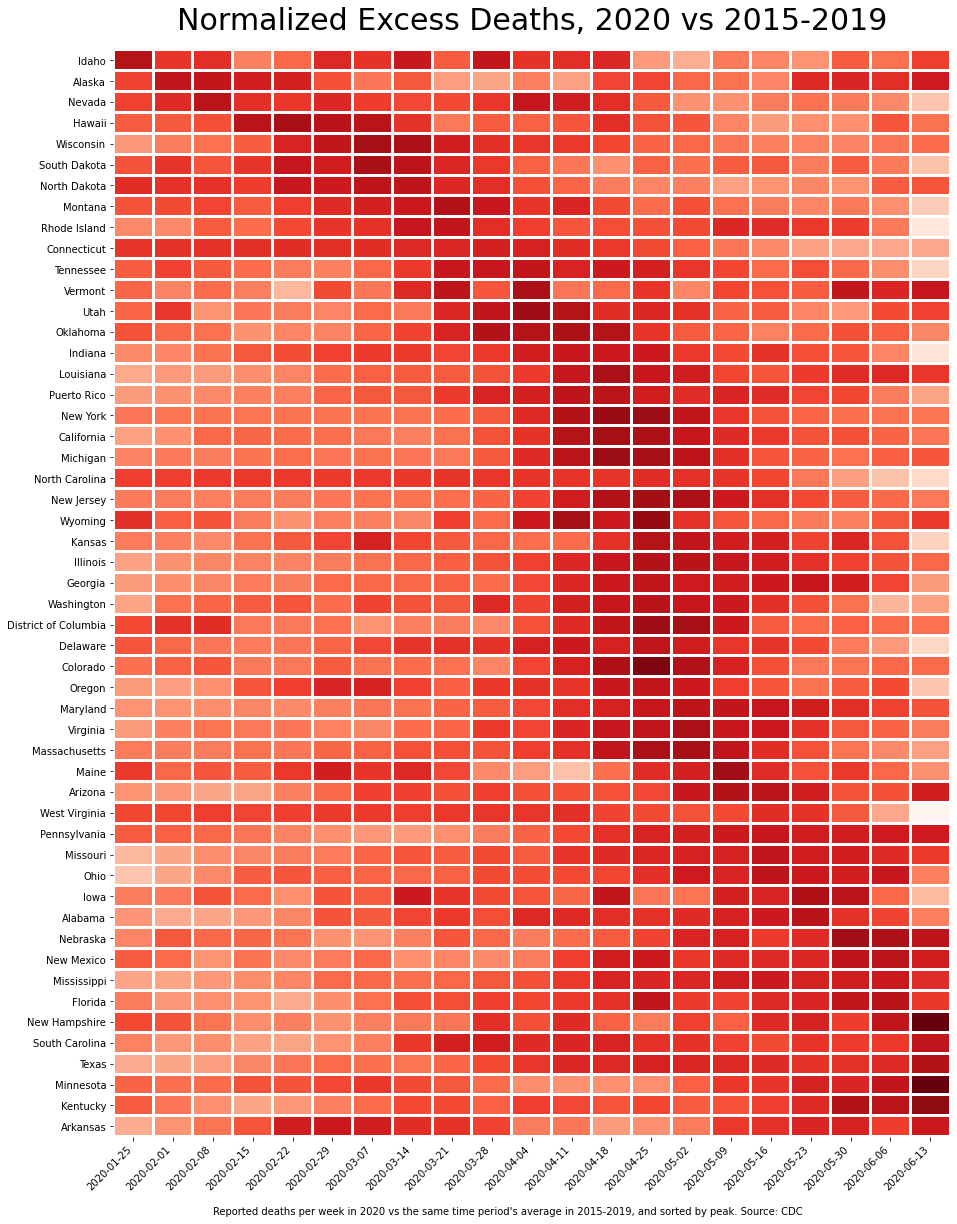

In [161]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,20))  

pvt2 = pivottable.copy()
pvt2['New York'] = pvt2['New York'] + pvt2['New York City']
pvt2 = pvt2.drop(['New York City'], axis=1)

df_norm_col=(pvt2-pvt2.mean())/pvt2.std()
df_norm_col_2 = df_norm_col.reindex(df_norm_col.idxmax().sort_values().index, axis=1)


sns.heatmap(df_norm_col_2.transpose(), 
            xticklabels=True, 
            yticklabels=True, 
            ax=ax, cbar=False, 
            linewidths=2, 
            linecolor='white', 
            cmap="Reds")
x_dates = df_norm_col_2.index.strftime('%Y-%m-%d').sort_values().unique()

ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title('Normalized Excess Deaths, 2020 vs 2015-2019', size=30, pad=20)

plt.annotate('Reported deaths per week in 2020 vs the same time period\'s average in 2015-2019, and sorted by peak. Source: CDC', (0,0), (100, -70), xycoords='axes fraction', textcoords='offset points', va='top')


In [14]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [149]:
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import image as PlotlyImage
from PIL import Image as PILImage
import io
import chart_studio

chart_studio.tools.set_credentials_file(username='hellodmo', api_key='TR6NU9TpOnIYl8bdfYgg')

pivottable2 = pivottable.copy()

pivottable2 = pivottable2.rename(columns=us_state_abbrev)


sortedvalues = np.sort(pivottable2.values.flatten().flatten())
mx = max(sortedvalues)
rg = max(sortedvalues) - min(sortedvalues)
mn = min(sortedvalues)
pivottable3 = (pivottable2 - mn).div(rg)
pivottable3 = pivottable3.resample(rule='8H').asfreq().interpolate()

bins = pd.qcut(sortedvalues, q=8, retbins=True)[1]
bins = (bins - bins.min()) / (bins.max() - bins.min())

colorscale = list(zip(bins, getattr(px.colors.sequential, 'Reds')))

images = []

for i in np.arange(0, pivottable3.shape[0]):
    
    data = pivottable3.iloc[i]
    fig = go.Figure(
        data=go.Choropleth(
            locations=data.index,
            z = data,
            locationmode = 'USA-states',
            colorscale = colorscale,
            showscale=False,
            zmin=0,
            zmax=1
        )
    )


    fig.update_layout(
        title= {
            "text":'Daily Excess Deaths ' + data.name.strftime('%-m-%-d-%Y'),
            'xanchor': 'center',
            'x':0.5
        },
        font=dict(
            size=18
        ),
        geo_scope='usa', # limite map scope to USA
        annotations=[
           go.layout.Annotation(
                showarrow=False,
                text='Source: CDC Excess Deaths (https://www.cdc.gov/nchs/nvss/vsrr/covid19/excess_deaths.htm)',
                xanchor='center',
                x=.5,
                yanchor='bottom',
                y=-0.2,
                font=dict(
                    size=12
                )
        ),
        go.layout.Annotation(
                showarrow=False,
                text='Darker colors indicate a higher death rate for 2020 when compared to the same time period in 2015-2019',
                xanchor='center',
                x=0.5,
                yanchor='bottom',
                y=-0.15,
                font=dict(
                    size=12
                ))]
    )


    img_bytes = fig.to_image(format='png')
    image = PILImage.open(io.BytesIO(img_bytes))
    image.save("gifdata/"+str(data.name).replace(':', '-')+".png")
    
    images.append(image)
    if i == pivottable3.shape[0] - 1:
        for i in np.arange(0,40):
            images.append(image)
    
images[0].save('gifdata/covid19-case.gif',
               save_all=True, append_images=images[1:], optimize=True, duration=75, loop=0)

![SegmentLocal](gifdata/covid19-case.gif "segment")

In [148]:
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import image as PlotlyImage
from PIL import Image as PILImage
import io
import chart_studio

chart_studio.tools.set_credentials_file(username='hellodmo', api_key='TR6NU9TpOnIYl8bdfYgg')

pivottable2 = pivottable.copy()

pivottable2 = pivottable2.rename(columns=us_state_abbrev)


sortedvalues = np.sort(pivottable2.values.flatten().flatten())
mx = max(sortedvalues)
rg = max(sortedvalues) - min(sortedvalues)
mn = min(sortedvalues)
pivottable3 = (pivottable2 - mn).div(rg)
pivottable3 = pivottable3.resample(rule='8H').asfreq().interpolate()

bins = pd.qcut(sortedvalues, q=8, retbins=True)[1]
bins = (bins - bins.min()) / (bins.max() - bins.min())

colorscale = list(zip(bins, getattr(px.colors.sequential, 'Reds')))

images = []

i = 20
data = pivottable3.iloc[i]
fig = go.Figure(
    data=go.Choropleth(
        locations=data.index,
        z = data,
        locationmode = 'USA-states',
        colorscale = colorscale,
        showscale=False,
        zmin=0,
        zmax=1, 
        text="blah"
    )
)

fig.update_layout(
    title= {
        "text":'Daily Excess Deaths ' + data.name.strftime('%-m-%-d-%Y'),
        'xanchor': 'center',
        'x':0.5
    },
    font=dict(
        size=18
    ),
    geo_scope='usa', # limite map scope to USA
    annotations=[
       go.layout.Annotation(
            showarrow=False,
            text='Source: CDC Excess Deaths (https://www.cdc.gov/nchs/nvss/vsrr/covid19/excess_deaths.htm)',
            xanchor='center',
            x=.5,
            yanchor='bottom',
            y=-0.2,
            font=dict(
                size=12
            )
    ),
    go.layout.Annotation(
            showarrow=False,
            text='Darker colors indicate a higher death rate for 2020 when compared to the same time period in 2015-2019',
            xanchor='center',
            x=0.5,
            yanchor='bottom',
            y=-0.15,
            font=dict(
                size=12
            ))]
)


fig.show()